In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [44]:
def mean_absolute_percentage_error(true,pred):
    return np.mean(np.abs((np.array(true) - np.array(pred)) / np.array(true))) * 100

# Simple forecasting methods

Baseline model: Repeat the previous X values, where X is the forecast horizon.

In [45]:
def baseline_model_forecast(history,horizon):
    history = np.array(history)
    yhat = history[-horizon:]
    return list(yhat)

In [46]:
df = pd.read_pickle('df_spot_dst.pickle')
#test_data = pd.read_pickle('test_df.pickle') # January 2019 test data
train = pd.DataFrame(data=df['2018'].values,index=df['2018'].index)
train = train[:-(24*10*7)]
test = df[-(24*10*7):]
history = [x for x in train.values]
predictions_baseline = []
horizon = 168
hour_counter = horizon
for i in tqdm(range(int(len(test)/horizon))):
    yhat_list = baseline_model_forecast(history,horizon)
    for yhat in yhat_list:
        predictions_baseline.append(yhat)
    for x in range(hour_counter-horizon,hour_counter):
        history.append(test.iloc[x])
    hour_counter += horizon # 24 hour timestep








  0%|          | 0/10 [00:00<?, ?it/s]






 30%|███       | 3/10 [00:00<00:00, 25.08it/s]






 50%|█████     | 5/10 [00:00<00:00, 21.18it/s]






 70%|███████   | 7/10 [00:00<00:00, 17.04it/s]






 90%|█████████ | 9/10 [00:00<00:00, 13.90it/s]






100%|██████████| 10/10 [00:00<00:00, 13.25it/s]

MAE 7.017845238095238 RMSE 11.240119295884465 MAPE 13.82849498614735


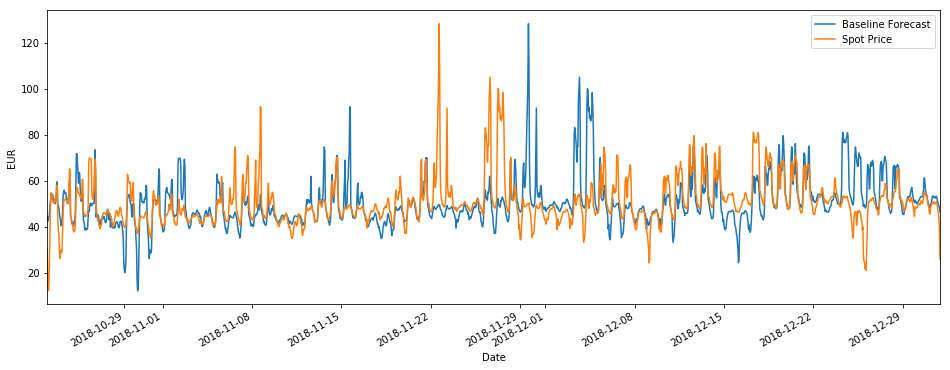

In [47]:
preds_baseline = pd.DataFrame(data=predictions_baseline,index=test.index)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
preds_baseline.plot(ax=axes)
test.plot(ax=axes)
axes.set_ylabel('EUR')
axes.legend(['Baseline Forecast','Spot Price'])
print(f"MAE {mean_absolute_error(test,preds_baseline)} RMSE {np.sqrt(mean_squared_error(test,preds_baseline))} MAPE {mean_absolute_percentage_error(test,preds_baseline)}")
plt.show()

## Moving Average


In [8]:
df = pd.read_pickle('df_spot_dst.pickle')
#test_data = pd.read_pickle('test_df.pickle') # January 2019 test data
train = pd.DataFrame(data=df['2018'].values,index=df['2018'].index)
train = train[:-(24*10*7)]
test = df[-(24*10*7):]
#test = pd.DataFrame(data=test_data['FI'].values,index=test_data.index)
# training data 2018
predictions_ar = list()
history_ar = [x for x in train.iloc[:,0]]
horizon = 24
hour_counter = horizon # 24-1 to prevent index out of bounds
print(len(train))
print(len(test))
print(len(history_ar))

7079
1680
7079


## Autoregression with walk-forward validation

In [25]:
from statsmodels.tsa.ar_model import AR
def ar_forecast(history,horizon):
    history = np.array(history)
    model = AR(history).fit()
    yhat = model.predict(len(history),len(history)+(horizon-1))
    return list(yhat)

In [35]:
df = pd.read_pickle('df_spot_dst.pickle')
#test_data = pd.read_pickle('test_df.pickle') # January 2019 test data
train = pd.DataFrame(data=df['2018'].values,index=df['2018'].index)
train = train[:-(24*10*7)].values
test = df[-(24*10*7):]
#test = pd.DataFrame(data=test_data['FI'].values,index=test_data.index)
# training data 2018
predictions_ar = list()
history_ar = [x for x in train]
horizon = 168
hour_counter = horizon # 24-1 to prevent index out of bounds
for i in tqdm(range(int(len(test)/horizon))):
    yhat_list = ar_forecast(history_ar,horizon)
    for yhat in yhat_list:
        predictions_ar.append(yhat)
    for x in range(hour_counter-horizon,hour_counter):
        history_ar.append(test.iloc[x])
    #history.append(test[hour_counter] for hour_counter in range(hour_counter,hour_counter+24))
    hour_counter += horizon # 24 hour timestep





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [00:00<00:00,  9.87it/s]



 30%|███       | 3/10 [00:00<00:00, 10.67it/s]



 50%|█████     | 5/10 [00:00<00:00, 10.81it/s]



 60%|██████    | 6/10 [00:00<00:00, 10.09it/s]



 70%|███████   | 7/10 [00:00<00:00,  9.39it/s]



 80%|████████  | 8/10 [00:00<00:00,  8.05it/s]



 90%|█████████ | 9/10 [00:01<00:00,  7.31it/s]



100%|██████████| 10/10 [00:01<00:00,  6.77it/s]





MAE 5.750122106173445 RMSE 9.136653209822551 MAPE 10.651986866768944


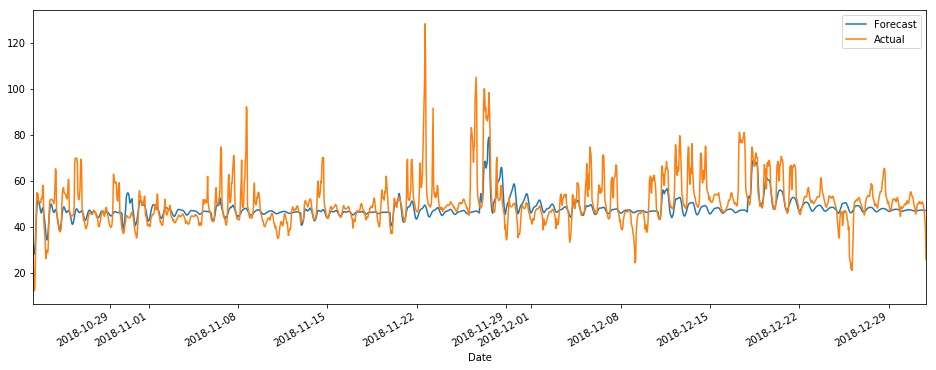

In [36]:
preds_ar = pd.DataFrame(data=predictions_ar,index=test.index)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
preds_ar.plot(ax=axes)
test.plot(ax=axes)
axes.legend(['Forecast','Actual'])
print(f"MAE {mean_absolute_error(test,preds_ar)} RMSE {np.sqrt(mean_squared_error(test,preds_ar))} MAPE {mean_absolute_percentage_error(test,preds_ar)}")
#axes.set_title(label=f"MAE {mean_absolute_error(test,preds_ar):.2f} RMSE {np.sqrt(mean_squared_error(test,preds_ar)):.2f}")
plt.show()

# GARCH

In [ ]:
from arch import arch_model
model = arch_model(train,mean='Zero',vol='GARCH',p=15,q=15)


## SARIMA
Seasonality component (daily, weekly, yearly)

# Holt-Winters Exponential Smoothing
## Walk-forward validation
24 hour multi-step forecasts

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def holt_winters_forecast(history):
    history = np.array(history)
    model = ExponentialSmoothing(history, seasonal='add', seasonal_periods=24).fit()
    yhat = model.predict(len(history),len(history)+23)
    return list(yhat)

In [41]:
df = pd.read_pickle('df_spot_dst.pickle')
#test_data = pd.read_pickle('test_df.pickle')
train = pd.DataFrame(data=df['2018':].values,index=df['2018':].index)
train = train[:-(24*10*7)].values
test = df[-(24*10*7):]

predictions_hw = list()
history_hw = [x for x in train]
hour_counter = 24 # 24-1 to prevent index out of bounds
for i in tqdm(range(int(len(test)/24))):
    yhat_list = holt_winters_forecast(history_hw)
    for yhat in yhat_list:
        predictions_hw.append(yhat)
    for x in range(hour_counter-24,hour_counter):
        history_hw.append(test.iloc[x])
    #history.append(test[hour_counter] for hour_counter in range(hour_counter,hour_counter+24))
    hour_counter += 24 # 24 hour timestep








  0%|          | 0/70 [00:00<?, ?it/s]






  1%|▏         | 1/70 [00:51<59:18, 51.58s/it]






  3%|▎         | 2/70 [01:43<58:31, 51.64s/it]






  4%|▍         | 3/70 [02:37<58:32, 52.42s/it]






  6%|▌         | 4/70 [03:31<58:06, 52.83s/it]






  7%|▋         | 5/70 [04:24<57:16, 52.87s/it]






  9%|▊         | 6/70 [05:17<56:32, 53.00s/it]






 10%|█         | 7/70 [06:17<57:46, 55.03s/it]






 11%|█▏        | 8/70 [07:17<58:27, 56.58s/it]






 13%|█▎        | 9/70 [08:11<56:42, 55.78s/it]






 14%|█▍        | 10/70 [09:05<55:15, 55.26s/it]






 16%|█▌        | 11/70 [10:06<55:56, 56.90s/it]






 17%|█▋        | 12/70 [10:59<54:04, 55.93s/it]






 19%|█▊        | 13/70 [11:59<54:17, 57.14s/it]






 20%|██        | 14/70 [12:54<52:28, 56.23s/it]






 21%|██▏       | 15/70 [13:47<50:55, 55.55s/it]






 23%|██▎       | 16/70 [14:42<49:37, 55.14s/it]






 24%|██▍       | 17/70 [15:43<50:21, 57.02s/it]






 26%|██▌       | 18/70 [16:38<48:59, 56

MAE 21.420536017491226 RMSE 24.751173763034366 MAPE 40.402065737528844


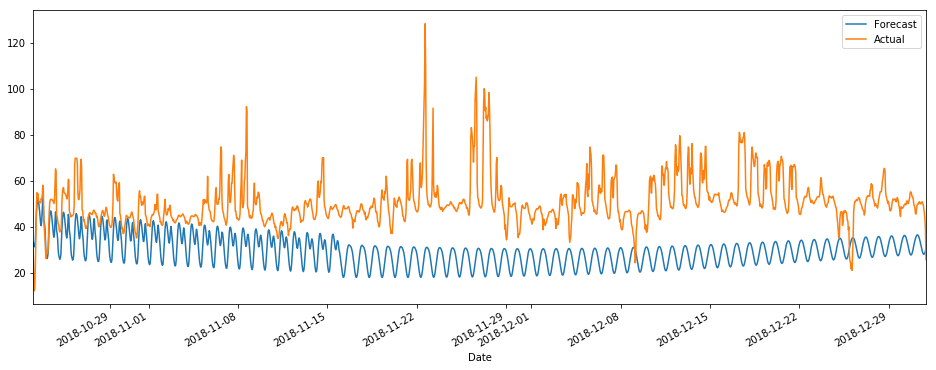

In [24]:
import matplotlib.pyplot as plt
preds = pd.DataFrame(data=predictions_hw,index=test.index)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
preds.plot(ax=axes)
test.plot(ax=axes)
axes.legend(['Forecast','Actual'])
print(f"MAE {mean_absolute_error(test,preds)} RMSE {np.sqrt(mean_squared_error(test,preds))} MAPE {mean_absolute_percentage_error(test,preds)}")
plt.show()

# Facebook Prophet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.https://github.com/facebook/prophet

Creating and fitting a model with Facebook Prophet, then predicting January 2019 spot prices with the model.

In [29]:
import fbprophet

train = combined_df['Spot'][:-(24*10*7)]
test = combined_df['Spot'][-(24*10*7):]
train = train['2018']
spot = pd.DataFrame(columns=['ds','y'])
spot['y'] = train
spot['ds'] = train.index
spot.index = pd.RangeIndex(len(spot.index))
scales = [0.0001,0.0005,0.001]
forecasts = []
for scale in scales:
    prophet = fbprophet.Prophet(changepoint_prior_scale=scale)
    prophet.fit(spot)
    forecast = prophet.make_future_dataframe(periods=len(test),freq='H')
    forecast = prophet.predict(forecast)
    forecast.set_index(['ds'],inplace=True)
    forecasts.append(forecast)

/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


To determine which changepoint prior scale fits our data best, we compare forecasted values to actual spot prices and calculate error with RMSE(Root mean squared error). The best result was with changepoint_prior_scale 0.05. Changepoint scaling adjusts the flexibility of the trend. The higher the value, the more flexible the trend will be.

In [31]:
print(f"Changepoint Prior Scale 0.0001 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[0]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[0]['2018-10-22 23:00:00':][['yhat']].values):.2f} ")
print(f"Changepoint Prior Scale 0.0005 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[1]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[1]['2018-10-22 23:00:00':][['yhat']].values):.2f} ")
print(f"Changepoint Prior Scale 0.001 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values):.2f} ")
#print(f"Changepoint Prior Scale 0.005 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[1]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[1]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
#print(f"Changepoint Prior Scale 0.01 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
#print(f"Changepoint Prior Scale 0.05 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[3]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[3]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
#print(f"Changepoint Prior Scale 0.1 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[4]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[4]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
#print(f"Changepoint Prior Scale 0.5 RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[5]['2018-10-22 23:00:00':][['yhat']].values)):.2f} MAE: {mean_absolute_error(test.values,forecasts[5]['2018-10-22 23:00:00':][['yhat']].values):.2f}")

Changepoint Prior Scale 0.0001 RMSE: 11.66 MAE: 9.74 
Changepoint Prior Scale 0.0005 RMSE: 10.11 MAE: 7.98 
Changepoint Prior Scale 0.001 RMSE: 9.30 MAE: 6.99 


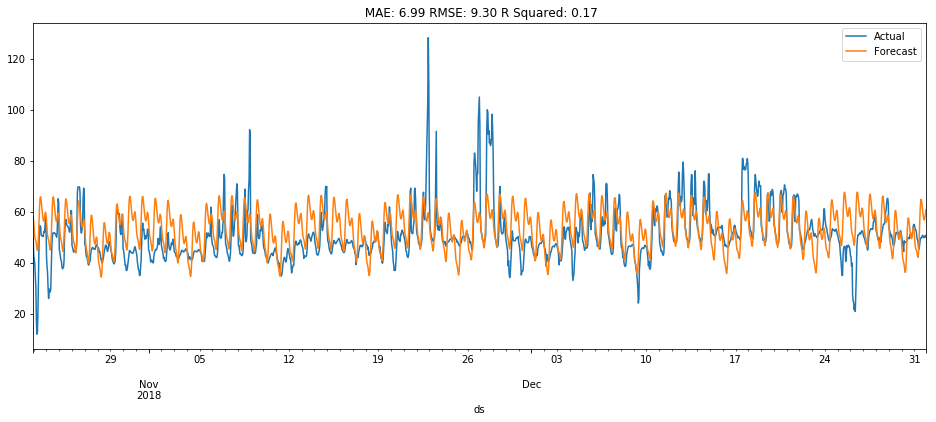

In [33]:
test.plot(figsize=(16,6))
forecasts[2]['2018-10-22 23:00:00':]['yhat'].plot()
plt.title(f" MAE: {mean_absolute_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values):.2f} RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values)):.2f} R Squared: {r2_score(test.values,forecasts[2]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
plt.legend(['Actual','Forecast'])

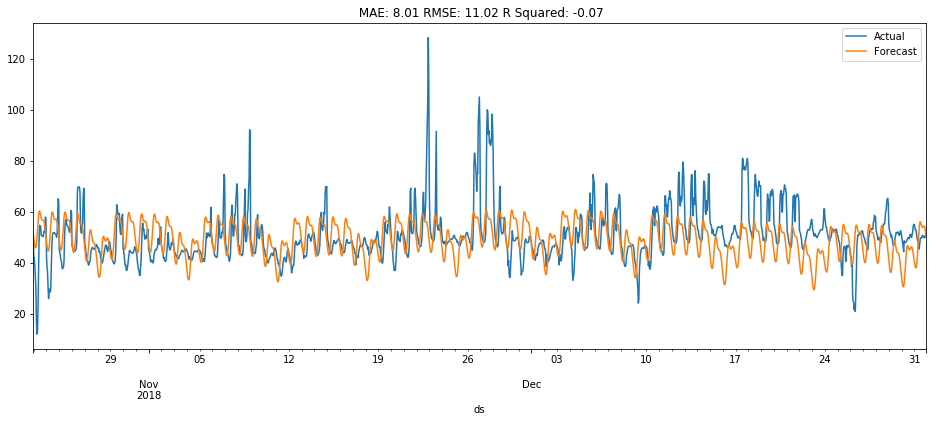

In [25]:
test.plot(figsize=(16,6))
forecasts[3]['2018-10-22 23:00:00':]['yhat'].plot()
plt.title(f" MAE: {mean_absolute_error(test.values,forecasts[5]['2018-10-22 23:00:00':][['yhat']].values):.2f} RMSE: {np.sqrt(mean_squared_error(test.values,forecasts[5]['2018-10-22 23:00:00':][['yhat']].values)):.2f} R Squared: {r2_score(test.values,forecasts[3]['2018-10-22 23:00:00':][['yhat']].values):.2f}")
plt.legend(['Actual','Forecast'])

# SARIMAX

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_pickle('combined_df_engineered_T-24.pickle')
test_df = pd.read_pickle('test_df.pickle')
df = df['2018-12':]
df
"""
df = df.asfreq(freq='H')
test_df = test_df.asfreq(freq='H')
df.drop(columns=df.columns[1:],inplace=True)
sarima = SARIMAX(df,order=(7,1,7),seasonal_order=(7,1,7,12),enforce_stationarity=False,enforce_invertibility=False,freq='H').fit()
pred = sarima.predict(test.index[0],test.index[-1])
"""

/home/joni/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/joni/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


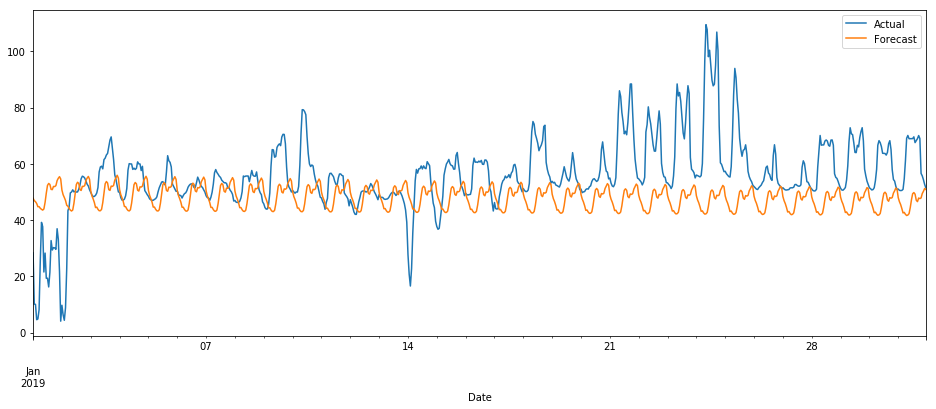

In [43]:
test_df.plot(figsize=(16,6))
pred.plot()
#plt.title(f" MAE: {mean_absolute_error(future_df.values,forecasts[3]['2019-01-01':][['yhat']].values):.2f} RMSE: {np.sqrt(mean_squared_error(future_df.values,forecasts[3]['2019-01-01':][['yhat']].values)):.2f}")
plt.legend(['Actual','Forecast'])

# Dickey-Fuller

In [17]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def dickey_fuller(df,col):
    print(f'Results of Dickey-Fuller Test for variable {col}:')
    results = adfuller(df[col], 
                      autolag='AIC')
    dfoutput = pd.Series(results[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in results[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print(dfoutput)

# Transforming data to make it stationary

In [53]:
combined_df = combined_df['2018']
combined_df['Spot_ma'] = combined_df['Spot'].rolling(window=216,center=False).mean()
combined_df['Spot_log'] = combined_df['Spot'].apply(lambda x: np.log(x))
combined_df['Spot_log_ma'] = combined_df['Spot_log'].rolling(window=216,center=False).mean()
combined_df['Spot_log_diff'] = combined_df['Spot_log'].diff()
combined_df['Spot_ma_diff'] = combined_df['Spot'] - combined_df['Spot_ma']
combined_df['Spot_log_ma_diff'] = combined_df['Spot_log'] - combined_df['Spot_log_ma']
combined_df_transformed = combined_df.dropna()
combined_df_transformed['Spot_log_ewma'] = combined_df_transformed['Spot_log'].ewm(halflife=7,ignore_na=False,min_periods=0,adjust=True).mean()
combined_df_transformed['Spot_log_ewma_diff'] = combined_df_transformed['Spot_log'] - combined_df_transformed['Spot_log_ewma']

/home/joni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/joni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Moving average of the logarithmic value of spot (column Spot_log_ma) with a window of 216 (9 days) has a p-value at the 0.05 level, which means that the null hypothesis could be rejected.

In [54]:
dickey_fuller(combined_df_transformed,'Spot')
dickey_fuller(combined_df_transformed,'Spot_ma')
dickey_fuller(combined_df_transformed,'Spot_log')
dickey_fuller(combined_df_transformed,'Spot_log_ma')
dickey_fuller(combined_df_transformed,'Spot_log_diff')
dickey_fuller(combined_df_transformed,'Spot_ma_diff')
dickey_fuller(combined_df_transformed,'Spot_log_ma_diff')
dickey_fuller(combined_df_transformed,'Spot_log_ewma')
dickey_fuller(combined_df_transformed,'Spot_log_ewma_diff')

Results of Dickey-Fuller Test for variable Spot:
Test Statistic                -8.489338e+00
p-value                        1.326490e-13
# Lags Used                    2.900000e+01
Number of Observations Used    8.512000e+03
Critical Value 1%             -3.431118e+00
Critical Value 5%             -2.861880e+00
Critical Value 10%            -2.566951e+00
dtype: float64
Results of Dickey-Fuller Test for variable Spot_ma:
Test Statistic                   -3.238768
p-value                           0.017848
# Lags Used                      29.000000
Number of Observations Used    8512.000000
Critical Value 1%                -3.431118
Critical Value 5%                -2.861880
Critical Value 10%               -2.566951
dtype: float64
Results of Dickey-Fuller Test for variable Spot_log:
Test Statistic                -8.442033e+00
p-value                        1.752678e-13
# Lags Used                    3.000000e+01
Number of Observations Used    8.511000e+03
Critical Value 1%             -

ACF and PACF

In [58]:
import matplotlib.pyplot as plt
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

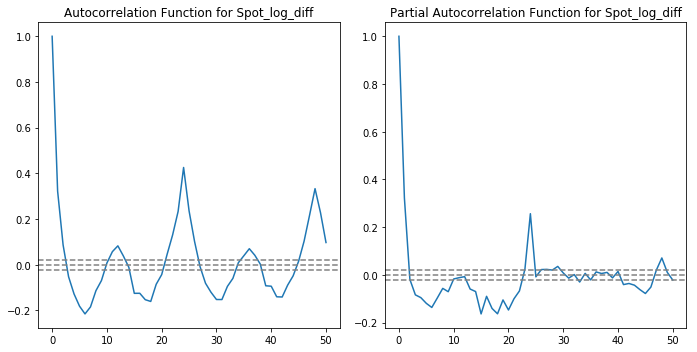

In [78]:
from statsmodels.tsa.stattools import acf, pacf
n_lags = 50
lag_acf = acf(np.array(combined_df_transformed['Spot_log_diff']), nlags = n_lags)
lag_pacf = pacf(np.array(combined_df_transformed['Spot_log_diff']), nlags = n_lags)
plot_acf_pacf(combined_df_transformed,'Spot_log_diff')